# Lithium Epileptiform Data: Visualisation and Analysis 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statistics 
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from scipy.stats import friedmanchisquare
from scipy.stats import ttest_rel

### Manually Importing the Data from Spreadsheet 

In [3]:
#freq = frequency, amp = amplitude
#data imported from refined spreadsheet 
baseline_freq_5mM = [0.144528571,0.094688889, 0.0488, 0.142062963] 
baseline_amp_5mM = [2.259055172, 1.340884211, 1.66446, 6.118614286]

five_min_freq_5mM = [0.206375, 0.121904348, 0.068253846, 0.152833333]
five_min_amp_5mM = [1.952426829, 0.946641667, 1.723864286, 5.801725806] 

ten_min_freq_5mM = [0.2067225, 0.18442, 0.076885714, 0.181479412]
ten_min_amp_5mM = [1.867431707, 0.951997222, 2.059786667, 5.651077143]

twenty_min_freq_5mM = [0.225895455, 0.17058125, 0.070292308, 0.191061111] 
twenty_min_amp_5mM = [1.660617778, 1.220857576, 2.070957143, 5.138530556]

wash_freq_5mM = [0.198538462, 0.101542105, 0.024375, 0.183274286]
wash_amp_5mM = [1.5565675, 1.10535, 2.08452, 4.248130556]

In [4]:
#Data for 10mM Li 
baseline_freq_10mM = [0.306165, 0.2094725, 0.225448889] 
baseline_amp_10mM = [1.293162295, 0.49022439, 1.515756522]

five_min_freq_10mM = [0.503545361, 0.266307547, 0.284492727]
five_min_amp_10mM = [0.904670408, 0.391912963, 1.417821429] 

ten_min_freq_10mM = [0.580791589, 0.288514286, 0.281812727]
ten_min_amp_10mM = [0.346012037, 0.291085965, 1.273275]

twenty_min_freq_10mM = [0, 0, 0] 
twenty_min_amp_10mM = [0, 0, 0]

wash_freq_10mM = [0.431880247, 0.243158696, 0.227268182]
wash_amp_10mM = [0.333252439, 0.257538298, 1.400684444] 

### Generate the Means for Plotting 

In [5]:
#Generating means for 5mM data
mean_baseline_freq_5mM = statistics.mean(baseline_freq_5mM) 
mean_baseline_amp_5mM = statistics.mean(baseline_amp_5mM) 

mean_five_min_freq_5mM = statistics.mean(five_min_freq_5mM)
mean_five_min_amp_5mM = statistics.mean(five_min_amp_5mM)

mean_ten_min_freq_5mM = statistics.mean(ten_min_freq_5mM)
mean_ten_min_amp_5mM = statistics.mean(ten_min_amp_5mM)

mean_twenty_min_freq_5mM = statistics.mean(twenty_min_freq_5mM)
mean_twenty_min_amp_5mM = statistics.mean(twenty_min_amp_5mM)

mean_wash_freq_5mM = statistics.mean(wash_freq_5mM)
mean_wash_amp_5mM = statistics.mean(wash_amp_5mM)

In [6]:
#Generating means for 10mM data 
mean_baseline_freq_10mM = statistics.mean(baseline_freq_10mM) 
mean_baseline_amp_10mM = statistics.mean(baseline_amp_10mM) 

mean_five_min_freq_10mM = statistics.mean(five_min_freq_10mM)
mean_five_min_amp_10mM = statistics.mean(five_min_amp_10mM)

mean_ten_min_freq_10mM = statistics.mean(ten_min_freq_10mM)
mean_ten_min_amp_10mM = statistics.mean(ten_min_amp_10mM)

mean_twenty_min_freq_10mM = statistics.mean(twenty_min_freq_10mM)
mean_twenty_min_amp_10mM = statistics.mean(twenty_min_amp_10mM)

mean_wash_freq_10mM = statistics.mean(wash_freq_10mM)
mean_wash_amp_10mM = statistics.mean(wash_amp_10mM)

### Initial Visulaisation and Normalising the Data

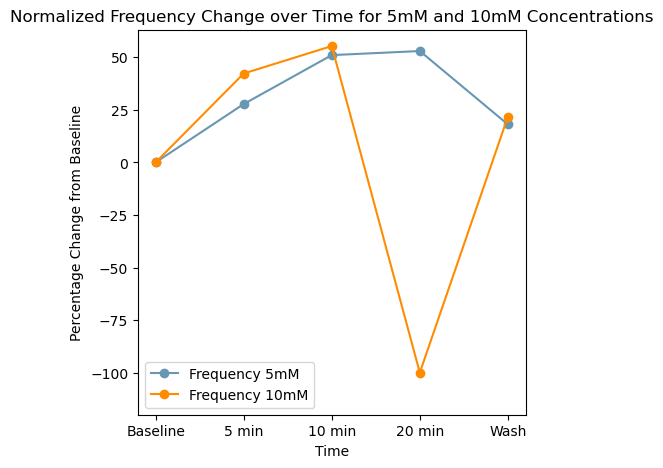

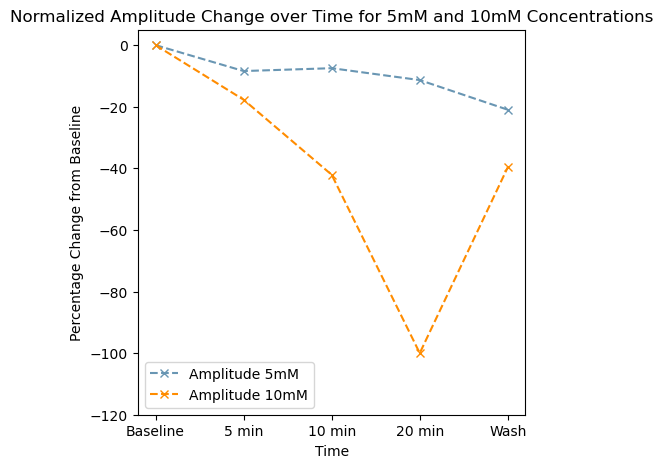

In [12]:
#Define time points for plotting 
time_points = ['Baseline', '5 min', '10 min', '20 min', 'Wash']

#Frequency and amplitude means for 5mM 
freq_means_5mM = [mean_baseline_freq_5mM, mean_five_min_freq_5mM, mean_ten_min_freq_5mM, mean_twenty_min_freq_5mM, mean_wash_freq_5mM]
amp_means_5mM = [mean_baseline_amp_5mM, mean_five_min_amp_5mM, mean_ten_min_amp_5mM, mean_twenty_min_amp_5mM, mean_wash_amp_5mM]

# Frequency and amplitude means for 10mM
freq_means_10mM = [mean_baseline_freq_10mM, mean_five_min_freq_10mM, mean_ten_min_freq_10mM, mean_twenty_min_freq_10mM, mean_wash_freq_10mM]
amp_means_10mM = [mean_baseline_amp_10mM, mean_five_min_amp_10mM, mean_ten_min_amp_10mM, mean_twenty_min_amp_10mM, mean_wash_amp_10mM]

# Normalize frequency data for 5mM and 10mM
norm_freq_5mM = [(value - mean_baseline_freq_5mM) / mean_baseline_freq_5mM * 100 for value in freq_means_5mM]
norm_freq_10mM = [(value - mean_baseline_freq_10mM) / mean_baseline_freq_10mM * 100 for value in freq_means_10mM]

# Normalize amplitude data for 5mM and 10mM
norm_amp_5mM = [(value - mean_baseline_amp_5mM) / mean_baseline_amp_5mM * 100 for value in amp_means_5mM]
norm_amp_10mM = [(value - mean_baseline_amp_10mM) / mean_baseline_amp_10mM * 100 for value in amp_means_10mM]

# Plotting normalized frequency
plt.figure(figsize=(5, 5))
plt.plot(time_points, norm_freq_5mM, label='Frequency 5mM', marker='o', color='#6996b3')  # Pastel Blue
plt.plot(time_points, norm_freq_10mM, label='Frequency 10mM', marker='o', color='darkorange')  # Pastel Red
plt.xlabel('Time')
plt.ylabel('Percentage Change from Baseline')
plt.title('Normalized Frequency Change over Time for 5mM and 10mM Concentrations')
plt.ylim(bottom=-120)
plt.legend()
plt.show()

# Plotting normalized amplitude
plt.figure(figsize=(5, 5))
plt.plot(time_points, norm_amp_5mM, label='Amplitude 5mM', linestyle='--', marker='x', color='#6996b3')  # Pastel Blue
plt.plot(time_points, norm_amp_10mM, label='Amplitude 10mM', linestyle='--', marker='x', color='darkorange')  # Pastel Red
plt.xlabel('Time')
plt.ylabel('Percentage Change from Baseline')
plt.title('Normalized Amplitude Change over Time for 5mM and 10mM Concentrations')
plt.ylim(bottom=-120)
plt.legend()
plt.show()



## Statistical Analysis (1-Way ANOVA with Repeated Measures) 

#### Creating the DataFrames for analysis  

In [10]:
#Create dictionaries to convert into pandas DataFrames 
freq_data_5mM = {
    'Subject' : ['Slice 1','Slice 2', ' Slice 3', 'Slice 4'] * 5,  #5 used here due to 5 measurements
    'Time_Point' : ['Baseline', '5 min', '10 min', '20 min', 'Wash'] * 4,  #Repeating for each subject 
    'Measurement' : baseline_freq_5mM + five_min_freq_5mM + ten_min_freq_5mM + twenty_min_freq_5mM + wash_freq_5mM,
    'Concentration' : ['5mM'] * 20
} 


amp_data_5mM = {
    'Subject' : ['Slice 1','Slice 2', ' Slice 3', 'Slice 4'] * 5,  #5 used here due to 5 measurements
    'Time_Point' : ['Baseline', '5 min', '10 min', '20 min', 'Wash'] * 4,  #Repeating for each subject 
    'Measurement' : baseline_amp_5mM + five_min_amp_5mM + ten_min_amp_5mM + twenty_min_amp_5mM + wash_amp_5mM,
    'Concentration' : ['5mM'] * 20
} 

freq_data_10mM = {
    'Subject' : ['Slice 1','Slice 2', ' Slice 3'] * 5,  #5 used here due to 5 measurements
    'Time_Point' : ['Baseline', '5 min', '10 min', '20 min', 'Wash'] * 3,  #Repeating for each subject 
    'Measurement' : baseline_freq_10mM + five_min_freq_10mM + ten_min_freq_10mM + twenty_min_freq_10mM + wash_freq_10mM,
    'Concentration' : ['5mM'] * 15
} 

amp_data_10mM = {
    'Subject' : ['Slice 1','Slice 2', ' Slice 3'] * 5,  #5 used here due to 5 measurements
    'Time_Point' : ['Baseline', '5 min', '10 min', '20 min', 'Wash'] * 3,  #Repeating for each subject 
    'Measurement' : baseline_amp_10mM + five_min_amp_10mM + ten_min_amp_10mM + twenty_min_amp_10mM + wash_amp_10mM,
    'Concentration' : ['5mM'] * 15
} 
#Converting dicts into DataFrames 
df_5mM_freq = pd.DataFrame(freq_data_5mM)
df_5mM_amp = pd.DataFrame(amp_data_5mM)
df_10mM_freq = pd.DataFrame(freq_data_10mM)
df_10mM_amp = pd.DataFrame(amp_data_10mM) 

#Example of pandas df 
df_5mM_freq.head()

,Subject,Time_Point,Measurement,Concentration
0,Slice 1,Baseline,0.144529,5mM
1,Slice 2,5 min,0.094689,5mM
2,Slice 3,10 min,0.048800,5mM
3,Slice 4,20 min,0.142063,5mM
4,Slice 1,Wash,0.206375,5mM


#### ANOVA with Repeated Measures for 5mM Frequency 

In [11]:
# Convert 'Time Point' to a categorical type
df_5mM_freq['Time_Point'] = pd.Categorical(df_5mM_freq['Time_Point'], 
                                           categories=['Baseline', '5 min', '10 min', '20 min', 'Wash'], 
                                           ordered=True)

# Perform the repeated measures ANOVA
aovrm = AnovaRM(df_5mM_freq, depvar='Measurement', subject='Subject', within=['Time_Point'])
results = aovrm.fit()

# Print the ANOVA table
print(results.summary()) # Can see from the output, no statistical difference is found between the time points in 5mM with resepct to frequency 

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Time_Point  0.5933 4.0000 12.0000 0.6742



#### ANOVA with Repeated Measures for 5mM Amplitude 

In [12]:
# Convert 'Time Point' to a categorical type
df_5mM_amp['Time_Point'] = pd.Categorical(df_5mM_amp['Time_Point'], 
                                           categories=['Baseline', '5 min', '10 min', '20 min', 'Wash'], 
                                           ordered=True)

# Perform the repeated measures ANOVA
aovrm = AnovaRM(df_5mM_amp, depvar='Measurement', subject='Subject', within=['Time_Point'])
results = aovrm.fit()

# Print the ANOVA table
print(results.summary()) # Can see from the output, no statistical difference is found between the time points in 5mM with resepct to amplitude 

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Time_Point  0.7398 4.0000 12.0000 0.5827



#### ANOVA with Repeated Measures for 10mM Frequency 

In [13]:
# Convert 'Time Point' to a categorical type
df_10mM_freq['Time_Point'] = pd.Categorical(df_10mM_freq['Time_Point'], 
                                           categories=['Baseline', '5 min', '10 min', '20 min', 'Wash'], 
                                           ordered=True)

# Perform the repeated measures ANOVA
aovrm = AnovaRM(df_10mM_freq, depvar='Measurement', subject='Subject', within=['Time_Point'])
results = aovrm.fit()

# Print the ANOVA table
print(results.summary()) # Can see from the output, no statistical difference is found between the time points in 5mM with resepct to frequency 

                 Anova
           F Value Num DF Den DF Pr > F
---------------------------------------
Time_Point  0.5572 4.0000 8.0000 0.7002



So, at this point I've realised something isnt adding up. Surely the data here must be significant as it drops to 0 at the 20 minute mark. That is for sure a significant effect. Therefore I will continue with a non-parametric test as with only 3 samples, one could argue that there simply isnt enough data to confirm if it truely is parametric. For this reason, I will continute the analysis using Friedman Chi Square, an alternative to an ANOVA with repeated measures. 

#### Friedman Chi Squared Analysis for 10mM Frequency

In [14]:
# Assuming data lists are your measurements at different time points
stat, p = friedmanchisquare(baseline_freq_10mM, five_min_freq_10mM, ten_min_freq_10mM, twenty_min_freq_10mM, wash_freq_10mM)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
if p > 0.05:
    print('No significant difference between time points.')
else:
    print('Significant difference found between time points.')

# Here the 'stat' variable (first number in the output) is an arb value that defines the varience in the data: higher values mean more likely 
# to be significant 

Statistics=11.467, p=0.022
Significant difference found between time points.


#### Friedman Chi Squared Analysis for 10mM Amplitude

In [15]:
# Assuming data lists are your measurements at different time points
stat, p = friedmanchisquare(baseline_amp_10mM, five_min_amp_10mM, ten_min_amp_10mM, twenty_min_amp_10mM, wash_amp_10mM)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation 
if p > 0.05:
    print('No significant difference between time points.')
else:
    print('Significant difference found between time points.')

Statistics=11.467, p=0.022
Significant difference found between time points.


#### Friedman Chi Squared Analysis for 5mM Frequency

In [16]:
# Assuming data lists are your measurements at different time points
stat, p = friedmanchisquare(baseline_freq_5mM, five_min_freq_5mM, ten_min_freq_5mM, twenty_min_freq_5mM, wash_freq_5mM)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
if p > 0.05:
    print('No significant difference between time points.')
else:
    print('Significant difference found between time points.')

Statistics=12.000, p=0.017
Significant difference found between time points.


#### Friedman Chi Squared Analysis for 5mM Amplitdue

In [17]:
# Assuming data lists are your measurements at different time points
stat, p = friedmanchisquare(baseline_amp_5mM, five_min_amp_5mM, ten_min_amp_5mM, twenty_min_amp_5mM, wash_amp_5mM)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
if p > 0.05:
    print('No significant difference between time points.')
else:
    print('Significant difference found between time points.')

Statistics=2.200, p=0.699
No significant difference between time points.


Post hoc tests just do not work at all with this data - maybe at this point consider doing a more simple statistical analytical approach such as comparing the means of the groups with paired t-test 

#### Paired T-Test for 10mM Amplitude

In [22]:
#Pivot the data to make it easier to work with 
df_10mM_amp_pivot = df_10mM_amp.pivot_table(index='Subject', columns='Time_Point', 
                          values='Measurement', aggfunc='first').reset_index()

# List of time points
time_points = ['5 min', '10 min', '20 min', 'Wash']

# Perform t-tests comparing Baseline with each other time point
results = {}
for time in time_points:
    t_stat, p_value = ttest_rel(df_10mM_amp_pivot['Baseline'], df_10mM_amp_pivot[time])
    results[f'Baseline vs {time}'] = (t_stat, p_value)

# Print results
for comparison, stats in results.items():
    print(f"{comparison} - T-statistic: {stats[0]:.3f}, P-value: {stats[1]:.3f}")


Baseline vs 5 min - T-statistic: 1.089, P-value: 0.390
Baseline vs 10 min - T-statistic: 0.489, P-value: 0.673
Baseline vs 20 min - T-statistic: 0.488, P-value: 0.674
Baseline vs Wash - T-statistic: 0.603, P-value: 0.608


In [24]:
df_10mM_amp_pivot

Time_Point,Subject,10 min,20 min,5 min,Baseline,Wash
0,Slice 3,1.515757,1.273275,0.000000,1.417821,1.400684
1,Slice 1,0.333252,0.904670,0.346012,1.293162,0.000000
2,Slice 2,0.291086,0.257538,0.490224,0.000000,0.391913
